In [5]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [6]:
from numpy.random import rand, randn

In [7]:
n, d, k = 100, 2, 2

In [8]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


In [12]:
blabla = np.zeros((6,))
print(blabla.shape)
print(blabla)

(6,)
[0. 0. 0. 0. 0. 0.]


## Computing the probability density

In [13]:
def compute_p(X, mean, sigma):
    """
    Compute the probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        p: (n, ) numpy array, the probability of each data point

    >>> compute_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([0.15915494, 0.05854983])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    [n, d] = np.shape(X)

    c = np.power(2*np.pi, d/2) * np.power(np.linalg.det(sigma), 0.5)

    inv_sigma = np.linalg.inv(sigma)

    ret = np.zeros(n,)

    for i in range(n):
        xmu = X[i].mean() - mean
        ret[i] = 1/c * np.exp(-0.5 * xmu.T.dot(inv_sigma).dot(xmu))

    return ret

    
    
    

    
    
    # ***************************************************
    #raise NotImplementedError


test(compute_p)

✅ Your `compute_p` passed 1 tests.


In [29]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping
print(type(ps), len(ps))
print(ps)

<class 'list'> 2
[array([4.49179770e+00, 2.21720591e+00, 6.06584982e-02, 3.91857909e-01,
       2.50240770e-01, 8.79199882e-01, 3.09877703e+00, 1.63609867e-01,
       2.94857776e-01, 1.97837943e-03, 1.20486806e+00, 7.11301233e-02,
       3.72634731e+00, 4.56328290e+00, 6.79576281e-01, 4.33677220e+00,
       1.11840088e-04, 3.61589063e+00, 2.20987882e-01, 7.15202911e-03,
       2.81835656e+00, 5.06573986e-02, 2.21844341e-01, 8.98899563e-02,
       8.21097125e-01, 2.32542335e+00, 3.68012566e+00, 4.59439717e+00,
       4.18932779e+00, 5.74086854e-01, 4.08578925e-03, 4.32498680e+00,
       3.44520307e+00, 2.92374036e-02, 1.92303794e-02, 3.75279839e+00,
       1.54765967e+00, 1.32907164e+00, 2.84668078e+00, 3.19488873e-01,
       7.39716830e-02, 1.20496061e-03, 2.10351551e-03, 2.99116602e+00,
       1.12051544e-05, 3.55084478e+00, 2.48792430e-06, 4.66004592e+00,
       4.37218389e+00, 2.95836911e+00, 3.13714900e+00, 1.17319614e-01,
       3.47342828e+00, 7.55692549e-02, 2.22478092e-01, 2.52

In [18]:
assignments = np.argmax(ps, axis=0)
print(assignments)

[0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


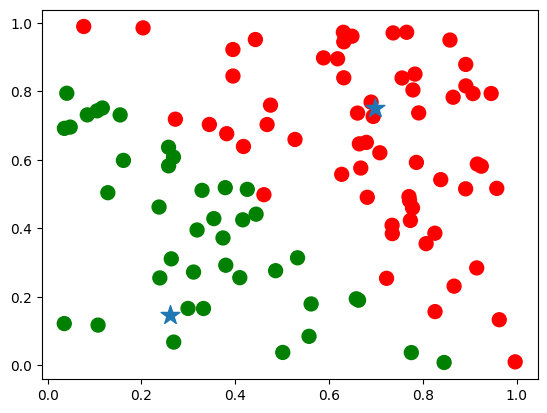

In [19]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

Solution
===

In [ ]:
def compute_log_p(X, mean, sigma):
    """
    Compute the log probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        log_p: (n, ) numpy array, the log probability of each data point

    >>> compute_log_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([-1.83787707, -2.83787707])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    raise NotImplementedError


test(compute_log_p)

In [ ]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [ ]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

In [ ]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()